#### Pivot Tables

Similar operation to groupby that is commonly used in spreadsheets and other programs that operate on tabular data.

The pivot table takes simple column-wise data as input and groups the entries into a two dimensional table that provides a multidimensional summarization.

Think of pivot tables as multidimensional versions of groupby. In other words, the split and combine happen across a two-dimensional grid.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0, 0.5, 'Count')

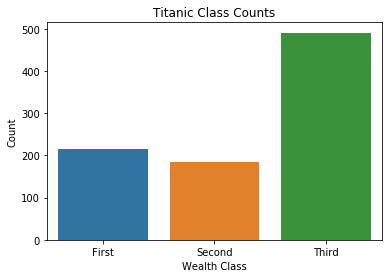

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = plt.figure()
class_counts = titanic['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Titanic Class Counts')
plt.xlabel('Wealth Class')
plt.ylabel('Count')

In [26]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [29]:
titanic.groupby(['sex', 'class'])['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [31]:
# the pivot_table syntax is more readable
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [35]:
# multi-level pivot tables
# first we use cut to place rows into bins on age
age = pd.cut(titanic['age'], [0, 18, 80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [36]:
titanic.pivot_table(
    values='survived', 
    index=['sex', age], 
    columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [41]:
# pd.qcut will compute quantiles
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table(
    values='survived',
    index=['sex', age],
    columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [42]:
# aggfunc keyword controls the type of aggregation applied
# it uses mean by default
titanic.pivot_table(
    index='sex',
    columns='class',
    aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [43]:
# notice that the values arg was ommitted.
# when specifying a mapping for aggfunc (the dict), values is
# inferred

In [46]:
# the margins keyword can be used to compute totals along
# each grouping, i.e. it adds an All row/column
titanic.pivot_table(
    values='survived',
    index='sex',
    columns='class',
    margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [47]:
titanic.pivot_table(
    values='survived',
    index='sex',
    columns='class',
    margins=False)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Birth Rate Example

In [49]:
births = pd.read_csv('../../data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [52]:
births.month.value_counts()

3     1310
8     1309
7     1308
12    1308
10    1308
1     1306
5     1305
11    1290
6     1288
9     1288
4     1287
2     1240
Name: month, dtype: int64

In [54]:
# add a decade column
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table(
    values='births',
    index='decade',
    columns='gender',
    aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'Births per year')

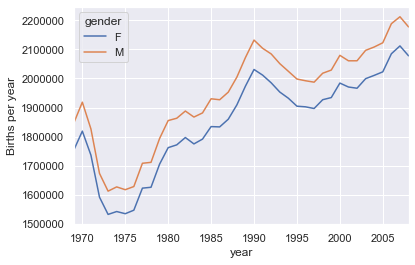

In [56]:
sns.set()
births.pivot_table('births', 'year', 'gender', aggfunc='sum').plot()
plt.ylabel('Births per year')

In [57]:
# removing outliers
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [58]:
births = births.query('(births >@mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [60]:
births['day'] = births['day'].astype(int)

/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
# create a date index
births.index = pd.to_datetime(
    10000 * births.year + 100 * births.month + births.day,
    format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


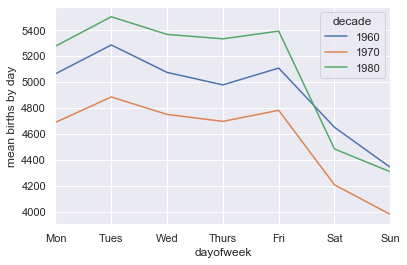

In [66]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [67]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [68]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


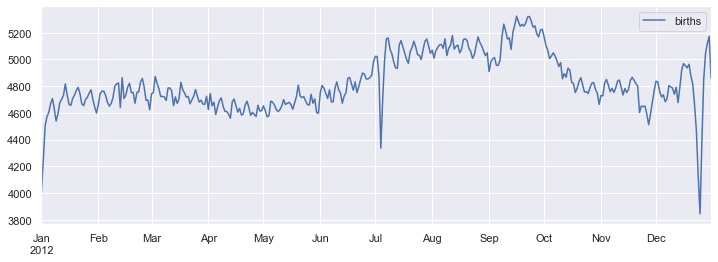

In [69]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);